In [188]:
import pandas as pd
import numpy as np
import pylab
import sys
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from ipywidgets import FloatProgress
from IPython.display import display
import seaborn
import math
import scipy
pd.options.mode.chained_assignment = None  # default='warn'

from datetime import datetime
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [4]:
def correlation_to_column(dataframe, keyword, lag):
    df = dataframe
    df['target'] = df[keyword]
    df = df.astype(float)
    df_temp = pd.DataFrame(columns = df.columns.tolist())
    
    f = FloatProgress(min =0,  max = lag)
    display(f)

    for j in range(lag):
        df['target'] = df['target'].shift(-1)
        df = df[:-1]
        df_temp.loc[j] = df.apply(lambda x:scipy.stats.pearsonr(x,df['target'].astype(float))[0] ,axis = 0)
        f.value += 1
    return(df_temp)

In [190]:
def correlation_to_column_ra(dataframe, keyword, lag):
    df = dataframe
    df['target'] = df[keyword]
    df = df.astype(float)
    df['target'] = df['target'].rolling(10).mean()
    df = df[9:]
    
    df_temp = pd.DataFrame(columns = df.columns.tolist())
    f = FloatProgress(min = 0, max= lag)
    display(f)
    
    for i in range(lag):
        df['target'] = df['target'].shift(-1)
        #df.drop(df.index[-1],axis = 0, inplace = True)
        df = df[:-1]
        df_temp.loc[i] = df.apply(lambda x:scipy.stats.pearsonr(x, df['target'].astype(float))[0], axis = 0)
        f.value += 1
    return(df_temp)

In [199]:
def build_ra(df, features):
    for i in features:
        df[i + '_ra'] = df[i].rolling(10).mean().shift(-10)
    df = df[:-10]
    return(df)

In [193]:
Features = ['VWAP_10_n_ask','VWAP_10_n_bid', 'VWAP_20_n_ask', 'Vola_last_10']#, 'VWAP_20_n_bid', 'Vola_last_10']


In [200]:
build_ra(BTC_USD_data, Features)

,Max_bid,Max_bid_volume,Mid,Min_ask,Min_ask_volume,VWAP_10_ask,VWAP_10_bid,VWAP_10_n_ask,VWAP_10_n_bid,VWAP_10_n_spread,...,twenty_last_added_volume_b,twenty_percent_mid_dev_volume_a,twenty_percent_mid_dev_volume_b,twenty_percent_volume_a,twenty_percent_volume_b,target,VWAP_10_n_ask_ra,VWAP_10_n_bid_ra,VWAP_20_n_ask_ra,Vola_last_10_ra
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-05-14 17:06:58+02:00,8754.4000000000,1.3700000000,8754.6000000000,8754.8000000000,0.7651309200,8757.20189001520000000000,8752.04473500000000000000,29720.26152194275009709181459,-29187.68418888355835789185114,515715501.5200000000000000000,...,101.6172576300,7216.9322634800,10013.1394625800,3424.2428763200,4378.9161148400,29720.26152194275009709181459,33689.331527,-30963.937925,51494.841659,95050.790832
2018-05-14 17:08:03+02:00,8757.0000000000,0.7029999900,8758.4000000000,8759.8000000000,0.0447918300,8762.64975841620000000000,8751.79136099300000000000,48522.08641075995615637559372,-75454.86626552795031055900621,1085839742.320000000000000000,...,460.7669726000,7221.2750093500,9946.1072778200,3436.7315513800,4318.1902371200,48522.08641075995615637559372,33288.786079,-30953.301628,53108.386699,100507.132212
2018-05-14 17:09:02+02:00,8754.9000000000,0.5959954500,8755.2000000000,8755.5000000000,0.0593951200,8762.65729843380000000000,8751.62900397510000000000,85175.64914336622807017543860,-40787.14392475328947368421053,1102829445.870000000000000000,...,766.6669209800,7230.6142185200,9941.3293134100,3444.7420615100,4319.7841679200,85175.64914336622807017543860,27696.123939,-29352.015021,49179.935724,105909.345514
2018-05-14 17:09:59+02:00,8750.0000000000,29.1650100000,8750.0500000000,8750.1000000000,4.9931720400,8750.60028279600000000000,8750.0000000000,6288.910303369695030314112491,-571.4253061411077650984851515,60028279.60000000000000000000,...,18448.1821402700,7037.8469015300,9911.7651465200,3253.2609329700,4085.3537066700,6288.910303369695030314112491,27124.572687,-33692.658785,46861.431328,109698.681658
2018-05-14 17:10:58+02:00,8736.7000000000,2.1600000000,8736.7500000000,8736.8000000000,5.9933215800,8737.40090176300000000000,8734.29388065390000000000,7450.158960711935216184507969,-28112.50574984977251266203108,310702110.9100000000000000000,...,316.9462806100,6812.9836378500,9928.4246261300,3174.6897901800,4097.2930289100,7450.158960711935216184507969,26436.962402,-31002.810363,45650.058217,113620.719840
2018-05-14 17:12:03+02:00,8742.5000000000,1.1928000000,8742.5500000000,8742.6000000000,0.2696795100,8750.18280508170000000000,8742.29941600000000000000,87306.39323423943815019645298,-2866.257556433763604440352071,788338908.1700000000000000000,...,179.3053218200,6810.1756734000,9934.6558247100,3170.8995482900,4101.4914449100,87306.39323423943815019645298,23958.059499,-30773.511895,42932.208473,115927.370204
2018-05-14 17:13:02+02:00,8743.5000000000,14.2224673600,8743.5500000000,8743.6000000000,14.2828022200,8743.6000000000,8743.5000000000,571.8501066500448902333720285,-571.8501066500448902333720285,10000000.0000000000,...,35.5327137800,6828.6863184700,9901.0452511400,3268.4734705500,4062.8448269400,571.8501066500448902333720285,23958.101388,-30882.806345,41854.484947,115206.400049
2018-05-14 17:14:01+02:00,8749.4000000000,0.0804220800,8749.4500000000,8749.5000000000,0.1255746300,8755.01837062010000000000,8748.98563847640000000000,63642.52175965346393201858403,-5307.322444267925412454497140,603273214.3700000000000000000,...,516.1630200800,6788.8106737900,9934.5324373200,3227.6695606500,4096.5241028700,63642.52175965346393201858403,17651.083316,-37989.240709,31614.540300,114767.323247
2018-05-14 17:15:03+02:00,8749.1000000000,2.7388986200,8749.1500000000,8749.2000000000,14.6775179200,8749.2000000000,8746.51791621350000000000,571.4840870255967722578764794,-30083.87999405656549493379357,268208378.6500000000000000000,...,3.6657416500,6798.6412766000,9890.5533886700,3236.3348677500,4050.1890359900,571.4840870255967722578764794,20759.363951,-35038.152405,40903.785292,114

In [191]:
correlation_to_column_ra(BTC_USD_data, 'VWAP_10_n_ask', 10)

FloatProgress(value=0.0, max=10.0)

,Max_bid,Max_bid_volume,Mid,Min_ask,Min_ask_volume,VWAP_10_ask,VWAP_10_bid,VWAP_10_n_ask,VWAP_10_n_bid,VWAP_10_n_spread,...,top_ten_volume_b,top_twenty_volume_a,top_twenty_volume_b,twenty_last_added_volume_a,twenty_last_added_volume_b,twenty_percent_mid_dev_volume_a,twenty_percent_mid_dev_volume_b,twenty_percent_volume_a,twenty_percent_volume_b,target
0,0.212808,-0.097744,0.212880,0.212953,-0.174306,0.214012,0.212582,0.580262,-0.173322,0.562199,...,-0.041225,-0.111383,-0.009053,0.108747,0.018572,0.011221,0.125728,-0.024461,0.121340,1.0
1,0.212527,-0.097599,0.212601,0.212675,-0.179993,0.213770,0.212301,0.599186,-0.173788,0.575668,...,-0.041714,-0.116800,-0.008854,0.109110,0.018587,0.010457,0.125616,-0.025516,0.121116,1.0
2,0.212247,-0.097262,0.212322,0.212397,-0.182942,0.213512,0.212019,0.609573,-0.175147,0.583740,...,-0.041948,-0.119861,-0.008499,0.109990,0.018141,0.009974,0.125565,-0.026049,0.121027,1.0
3,0.211965,-0.096378,0.212041,0.212116,-0.184422,0.213241,0.211735,0.614763,-0.176084,0.587952,...,-0.042112,-0.122002,-0.008246,0.110107,0.017764,0.009630,0.125562,-0.026331,0.121011,1.0
4,0.211684,-0.094996,0.211760,0.211835,-0.184256,0.212960,0.211455,0.614764,-0.175832,0.587713,...,-0.042022,-0.122614,-0.007650,0.110104,0.017610,0.009450,0.125627,-0.026310,0.121120,1.0
5,0.211401,-0.093136,0.211476,0.211551,-0.182686,0.212666,0.211172,0.609572,-0.175570,0.583919,...,-0.041320,-0.121220,-0.006768,0.111259,0.017216,0.009481,0.125705,-0.025861,0.121399,1.0
6,0.211132,-0.090691,0.211206,0.211281,-0.179442,0.212376,0.210903,0.599188,-0.175116,0.576480,...,-0.040486,-0.118345,-0.005978,0.112149,0.016876,0.009703,0.125831,-0.025166,0.121731,1.0
7,0.210879,-0.088327,0.210952,0.211025,-0.173309,0.212084,0.210650,0.580263,-0.174781,0.563092,...,-0.039711,-0.113617,-0.005561,0.113444,0.016559,0.010131,0.125965,-0.024134,0.122113,1.0
8,0.210665,-0.086021,0.210736,0.210806,-0.162592,0.211795,0.210429,0.543910,-0.177669,0.539705,...,-0.039367,-0.105612,-0.006086,0.114329,0.017495,0.010878,0.126094,-0.022665,0.122431,1.0
9,0.210666,-0.091416,0.210723,0.210780,-0.134369,0.211501,0.210359,0.405715,-0.207676,0.462572,...,-0.044666,-0.087676,-0.010968,0.115535,0.018324,0.012520,0.126029,-0.019959,0.122508,1.0


In [3]:
def pandas_time_object_to_seconds(pt):
    
    if type(pt) == pd._libs.tslibs.timestamps.Timestamp:
        return(pt.to_pydatetime().time().second)
    
    if type(pt) == pd.core.series.Series:
        if type(pt.iloc[0]) == pd._libs.tslibs.timestamps.Timestamp:
            return(pt.iloc[0].to_pydatetime().time().second)
        if type(pt.iloc[0]) == datetime:
            return(pt.iloc[0].time().second)
        
def filter_to_minutes(df):
    check = 0
    temp = df
    if temp.index.name == 'Timestamp':
        check = 1
        temp.reset_index(inplace = True)
    temp['temp'] = temp['Timestamp']
    temp['temp'] = temp['temp'].apply(pandas_time_object_to_seconds) 
    temp = temp.loc[(temp['temp'] <= 10) | (temp['temp'] >= 50)]
    temp.drop(['temp'], axis = 1, inplace = True)
    if check ==1:
        temp.set_index('Timestamp', inplace = True)
    return(temp)

In [4]:
def build_targets(df, target, lag):
    df.dropna(inplace = True)
    df['target'] = df[target].shift(-lag)
    df = df[0:-lag]
    return(df)

In [5]:
BTC_USD_data = pd.read_hdf('C:/Users/janpa/Desktop/Uni/Bachelorarbeit/gathered_stats/BTC_USD_all_dbs_BitFinex_corrected_vola.h5')

In [84]:
BTC_USD_data.reset_index()['Timestamp'].apply(unlist_things)
#.sort_values(by = 'Timestamp', ascending = True)
#[154810:154820]

0         2018-05-14 17:06:02+02:00
1         2018-05-14 17:06:58+02:00
2         2018-05-14 17:08:03+02:00
3         2018-05-14 17:09:02+02:00
4         2018-05-14 17:09:59+02:00
5         2018-05-14 17:10:58+02:00
6         2018-05-14 17:12:03+02:00
7         2018-05-14 17:13:02+02:00
8         2018-05-14 17:14:01+02:00
9         2018-05-14 17:15:03+02:00
10        2018-05-14 17:16:04+02:00
11        2018-05-14 17:17:03+02:00
12        2018-05-14 17:18:02+02:00
13        2018-05-14 17:18:59+02:00
14        2018-05-14 17:20:03+02:00
15        2018-05-14 17:21:03+02:00
16        2018-05-14 17:22:05+02:00
17        2018-05-14 17:23:04+02:00
18        2018-05-14 17:24:03+02:00
19        2018-05-14 17:24:57+02:00
20        2018-05-14 17:26:02+02:00
21        2018-05-14 17:26:58+02:00
22        2018-05-14 17:28:01+02:00
23        2018-05-14 17:29:03+02:00
24        2018-05-14 17:29:59+02:00
25        2018-05-14 17:31:01+02:00
26        2018-05-14 17:32:01+02:00
27        2018-05-14 17:33:0

In [4]:
temp = filter_to_minutes(BTC_USD_data)

In [8]:
def prepare_data(df, features, target, lag):
    temp = filter_to_minutes(df[features])
    temp.dropna(inplace = True)
    temp['target'] = temp[target].shift(-lag)
    temp = temp[0:-lag]
    return(temp)
    

In [148]:
1.375055e+08

137505500.0

In [165]:
def scale_data(df):
    df.astype(float)
    small_columns = ['VWAP_10_n_ask', 'VWAP_10_n_bid','VWAP_10_n_spread',\
                     'VWAP_20_n_ask', 'VWAP_20_n_bid','VWAP_20_n_spread',\
                    'Vola_last_10']

    df[small_columns] =  df[small_columns].apply(lambda x: x*10000)
    return df[small_columns]

In [166]:
scale_data(BTC_USD_data)


,VWAP_10_n_ask,VWAP_10_n_bid,VWAP_10_n_spread,VWAP_20_n_ask,VWAP_20_n_bid,VWAP_20_n_spread,Vola_last_10
Timestamp,,,,,,,
2018-05-14 17:06:58+02:00,2.972026152194275009709181459,-2.918768418888355835789185114,51571.55015200000000000000,6.034488304091563292440545542,-4.086574486555639321042651863,88605.85630700000000000000,7.829099
2018-05-14 17:08:03+02:00,4.852208641075995615637559372,-7.545486626552795031055900621,108583.97423200000000000000,5.623035266829557910120569967,-8.568139732713737668980635733,124291.98711600000000000000,7.473255
2018-05-14 17:09:02+02:00,8.517564914336622807017543860,-4.078714392475328947368421053,110282.94458700000000000000,9.284367252489948830409356725,-5.009020938927722953216374269,125141.47229350000000000000,7.512033
2018-05-14 17:09:59+02:00,0.6288910303369695030314112491,-0.05714253061411077650984851515,6002.82796000000000000000,3.064509067148187724641573477,-0.05714253061411077650984851515,27314.60756300000000000000,8.053610
2018-05-14 17:10:58+02:00,0.7450158960711935216184507969,-2.811250574984977251266203108,31070.21109100000000000000,3.139825479154147709388502590,-5.263159393538787306492688929,73414.77808650000000000000,7.515757
2018-05-14 17:12:03+02:00,8.730639323423943815019645298,-0.2866257556433763604440352071,78833.89081700000000000000,12.82862075658703696289984044,-2.713085809289051821264962740,135874.14673750000000000000,8.749211
2018-05-14 17:13:02+02:00,0.05718501066500448902333720285,-0.05718501066500448902333720285,1000.0000000000,1.134950424713074208988339976,-0.6929852501558291540621372326,15982.64697000000000000000,10.778842
2018-05-14 17:14:01+02:00,6.364252175965346393201858403,-0.5307322444267925412454497140,60327.32143700000000000000,10.48788720731017378235203356,-1.945951005834652463869157490,108789.24575400000000000000,10.454152
2018-05-14 17:15:03+02:00,0.05714840870255967722578764794,-3.008387999405656549493379357,26820.83786500000000000000,0.5729175858226227690689952738,-8.760804909734088454306989822,81662.13817200000000000000,10.894767


In [111]:
keys = ['VWAP_20_n_ask', 'VWAP_20_n_bid', 'VWAP_20_n_spread',\
        'VWAP_10_n_spread','Vola_last_10','VWAP_10_n_ask', 'VWAP_10_n_bid']
for i in keys:
    
    name = 'C:/Users/janpa/Desktop/Uni/Bachelorarbeit/gathered_stats/BTC_USD_BitFinex_RA_correlations_'+i+'.h5'
    temp_x = correlation_to_column_ra(temp.dropna(), i, 120)
    temp_x.to_hdf(name, key = 'BitFinex', mode = 'w')
        

FloatProgress(value=0.0, max=120.0)

FloatProgress(value=0.0, max=120.0)

FloatProgress(value=0.0, max=120.0)

FloatProgress(value=0.0, max=120.0)

FloatProgress(value=0.0, max=120.0)

FloatProgress(value=0.0, max=120.0)

FloatProgress(value=0.0, max=120.0)

In [87]:
def get_training_starting_points(df):
    length = df.shape[0]
    nr_of_batches = round((length-90*1440)/(30*1440))
    starting_points = []
    for i in range(nr_of_batches):
        starting_points.append(1440*30*i)
    return(starting_points)

In [142]:
get_training_starting_points(temp)

[0, 43200, 86400, 129600, 172800, 216000, 259200, 302400, 345600]

In [88]:
def apply_model(df, target_name, lag, method, ret_pred, debug):
    
    
    n_est = 1000
    if debug == 1:
        n_est = 10
    
    df.dropna(inplace = True)

    #df.sort_values(by = 'Timestamp', ascending = True, inplace = True)
    #df.reset_index()['Timestamp'].apply(unlist_things).sort_values(inplace = True, ascending = True)
    points = get_training_starting_points(df)
    
    f = FloatProgress(min = 0, max = len(points))
    display(f)
    results = []
    Data = {
        'prediction':[],
        'benchmark':[],
        'Value':[],
        'Timestamp':[]
    }
    for i in points:
        if method == 0:
            model = RandomForestRegressor(max_depth=10, random_state=1, n_estimators=n_est, n_jobs=-1)
        if method == 1:
            model = LinearRegression(n_jobs = -1)
        train_df = df[i:i+1440*90]
        Y_train = train_df[target_name].shift(-lag)[0:-lag]
        X_train = train_df[0:-lag]
        
        model.fit(X_train,Y_train)
        
        test_df = df[i+1440*90:i+1440*90 +1400*30]
        Y_test = test_df[target_name].shift(-lag)[0:-lag]
        X_test = test_df[0:-lag]
        Timestamp = X_test.index.tolist()
        
        prediction_test = model.predict(X_test).tolist()
        prediction_train = model.predict(X_train).tolist()

        mse_train = mean_squared_error(Y_train, prediction_train)
        mse_test = mean_squared_error(Y_test, prediction_test)
        mse_benchmark_train = mean_squared_error(Y_train, X_train[target_name])
        mse_benchmark_test = mean_squared_error(Y_test, X_test[target_name])
        
        result = {
            'i': i,
            'mse_train': mse_train,
            'mse_test': mse_test,
            'benchmark_mse_train': mse_benchmark_train,
            'benchmark_mse_test': mse_benchmark_test,
        }
        if method == 0 :
            result['feature_imp'] = model.feature_importances_,

        
        results.append(result)
        if ret_pred == 1:

            Data['prediction'] = Data['prediction'] + prediction_test
            Data['benchmark'] = Data['benchmark'] + X_test[target_name].values.tolist()
            Data['Value'] = Data['Value'] + Y_test.values.tolist()
            Data['Timestamp'] = Data['Timestamp'] + Timestamp
        

        f.value += 1
    if ret_pred == 1:
        prediction_frame = pd.DataFrame(data = Data)
        prediction_frame.set_index('Timestamp', inplace = True)
        return(prediction_frame, results)
    return(results)
        

C:\Users\janpa\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


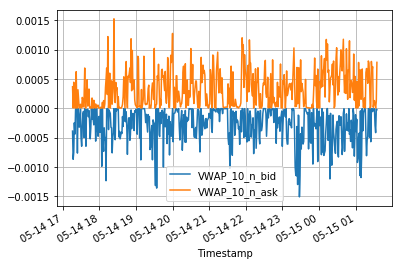

In [491]:

fig =temp[0:500].astype(float).reset_index().plot(x= 'Timestamp', y = ['VWAP_10_n_bid', 'VWAP_10_n_ask'])
fig.grid('on')
fig

In [81]:
def unlist_things(X):
    if type(X) == pd.core.series.Series:
        X = X.iloc[0]
    return(X)

In [111]:
BTC_USD_data.columns

Index(['Max_bid', 'Max_bid_volume', 'Mid', 'Min_ask', 'Min_ask_volume',
       'VWAP_10_ask', 'VWAP_10_bid', 'VWAP_10_n_ask', 'VWAP_10_n_bid',
       'VWAP_10_n_spread', 'VWAP_20_ask', 'VWAP_20_bid', 'VWAP_20_n_ask',
       'VWAP_20_n_bid', 'VWAP_20_n_spread', 'Vola_last_10', 'ask_total_volume',
       'av_ask_volume_price_ratio', 'av_bid_volume_price_ratio',
       'bid_total_volume', 'five_last_added_volume_a',
       'five_last_added_volume_b', 'five_percent_mid_dev_volume_a',
       'five_percent_mid_dev_volume_b', 'five_percent_volume_a',
       'five_percent_volume_b', 'log_returns', 'mean_ask_price',
       'mean_ask_volume', 'mean_bid_price', 'mean_bid_volume', 'number_asks',
       'number_bids', 'spread', 'ten_last_added_volume_a',
       'ten_last_added_volume_b', 'ten_percent_mid_dev_volume_a',
       'ten_percent_mid_dev_volume_b', 'ten_percent_volume_a',
       'ten_percent_volume_b', 'top_five_volume_a', 'top_five_volume_b',
       'top_ten_volume_a', 'top_ten_volume_b',

In [184]:
test_data = prepare_data(df=scale_data(BTC_USD_data),\
                         features=['VWAP_10_n_ask','VWAP_10_n_bid', \
                                    'VWAP_20_n_bid', 'VWAP_20_n_ask',\
                                  'Vola_last_10',\
                                  'av_ask_volume_price_ratio', 'av_bid_volume_price_ratio',\
                                  'five_last_added_volume_a',
       'five_last_added_volume_b', 'five_percent_mid_dev_volume_a',
       'five_percent_mid_dev_volume_b', 'five_percent_volume_a',
       'five_percent_volume_b' ],\
                         target='VWAP_10_n_ask',lag= 10)

KeyError: "['av_ask_volume_price_ratio' 'av_bid_volume_price_ratio'\n 'five_last_added_volume_a' 'five_last_added_volume_b'\n 'five_percent_mid_dev_volume_a' 'five_percent_mid_dev_volume_b'\n 'five_percent_volume_a' 'five_percent_volume_b'] not in index"

In [ ]:
start = time.time()
Results_5 = apply_model(df=test_data,
                      target_name= 'VWAP_10_n_ask',
                      lag= 10,
                      method= 0,
                      ret_pred=1,
                      debug=1)
end = time.time()

print(end-start)


#pd.DataFrame(VWAP_10_n_ask_results[0])

In [176]:
Res = pd.DataFrame(Results_5[0]).astype(float)


In [173]:
pd.DataFrame(Results_5[0])

,prediction,benchmark,Value
Timestamp,,,
2018-04-27 00:36:05+02:00,2.611109,0.8201071170241235615705164965,1.182285418743904498820401336
2018-04-27 00:36:59+02:00,3.535234,2.111179100923544093632406512,2.525113343222372496836961738
2018-04-27 00:37:58+02:00,2.860332,4.246771113235687789208000306,6.286760262648407803100952755
2018-04-27 00:39:00+02:00,2.991737,3.633118711802918631270112713,0.05453781925075943913306682519
2018-04-27 00:40:00+02:00,4.243546,4.332396539791631383132740752,2.694244945925752212872016100
2018-04-27 00:41:08+02:00,3.834813,6.480742168374593047392225840,3.769513131307623944299352813
2018-04-27 00:41:59+02:00,2.987586,5.059598671319887055636568195,1.510577286339578211788048426
2018-04-27 00:42:59+02:00,3.657294,1.937184055258807418036588227,1.165722134758823753103320893
2018-04-27 00:43:58+02:00,3.476766,4.804108262114477379946006381,0.3156080599851231682222186026


In [177]:
Res['mse_pred'] = (Res['Value'] - Res['prediction'])**2
Res['mse_bench'] = (Res['Value'] - Res['benchmark'])**2


C:\Users\janpa\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


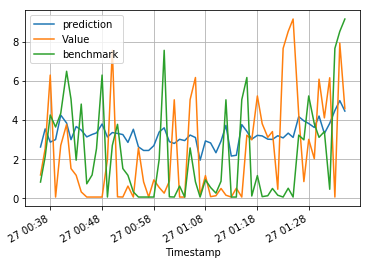

In [181]:
fig_vola = Res.astype(float).reset_index()[0:60].plot(x = 'Timestamp', y = ['prediction', 'Value', 'benchmark'])
fig_vola.grid('on')
fig_vola_ = fig_vola.get_figure()


In [737]:
pd.DataFrame(Results_5[1])['feature_imp'][1]

array([0.00315645, 0.00481954, 0.00997048, 0.00300084, 0.00302252,
       0.21765399, 0.03686988, 0.01536896, 0.31285395, 0.0036112 ,
       0.00947496, 0.0087257 , 0.00327015, 0.01165793, 0.00238037,
       0.00255196, 0.00190757, 0.00272704, 0.01339275, 0.00394022,
       0.00126339, 0.01151535, 0.0024794 , 0.00389031, 0.00497026,
       0.00314898, 0.00381503, 0.00178186, 0.00328141, 0.00170577,
       0.00682057, 0.00145213, 0.00904361, 0.00295669, 0.00786398,
       0.00363949, 0.00198679, 0.00764338, 0.01236512, 0.01045153,
       0.00278781, 0.02478071])

In [515]:
RF_res = pd.DataFrame(VWAP_10_n_ask_results[1])

In [707]:
pd.DataFrame(Results_2[1])

,benchmark_mse_test,benchmark_mse_train,feature_imp,i,mse_test,mse_train
0,1.557426e-07,1.537029e-07,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,9.483522e-08,9.278281e-08
1,1.480732e-07,1.671216e-07,"[0.0015589606890005212, 0.0018330140544502427,...",43200,8.187222e-08,9.373745e-08
2,1.229039e-07,1.530012e-07,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",86400,7.506336e-08,8.860000e-08
3,9.647225e-08,1.417861e-07,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",129600,6.181676e-08,8.374242e-08
4,8.260660e-08,1.218735e-07,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",172800,5.203844e-08,7.128057e-08
5,9.920258e-08,1.006936e-07,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",216000,5.644732e-08,5.866234e-08
6,8.890363e-08,9.275989e-08,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",259200,4.984375e-08,5.255795e-08
7,1.119668e-07,9.096428e-08,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",302400,6.305935e-08,5.147919e-08
8,7.346895e-08,1.002938e-07,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",345600,4.471737e-08,5.641879e-08


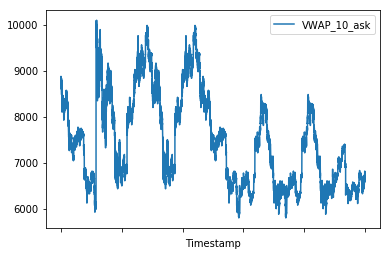

In [218]:
Plot = BTC_USD_data[0:500000].astype(float).reset_index().plot(x = 'Timestamp', y = 'VWAP_10_ask')


In [219]:
Plot.grid('on')
Plot.axvspan(xmin=0, xmax =129600,facecolor='orange', alpha=0.5)
Plot.axvspan(xmin=129600, xmax =172800,facecolor='blueviolet', alpha=0.5)
fig = Plot.get_figure()


C:\Users\janpa\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [220]:
fig.savefig('C:/Users/janpa/Desktop/Uni/Bachelorarbeit/gathered_stats/study_design_1.png')

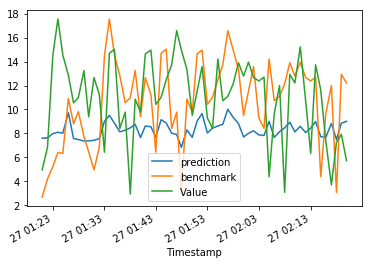

In [505]:
P1 = VWAP_10_n_ask_results[0][0:60].astype(float).reset_index().plot(x ='Timestamp', y = ['prediction','benchmark', 'Value'])

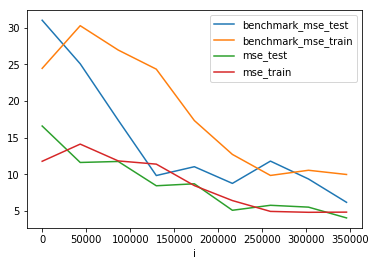

In [508]:
P2 = pd.DataFrame(VWAP_10_n_ask_results[1]).plot(x = 'i', \
                                            y = ['benchmark_mse_test', 'benchmark_mse_train', 'mse_test', 'mse_train'])

C:\Users\janpa\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


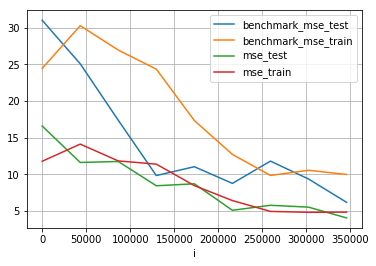

In [511]:
P2.grid('on')
fig2 = P2.get_figure()
fig2
#fig2.savefig('C:/Users/janpa/Desktop/Uni/Bachelorarbeit/gathered_stats/VWAP_10_n_ask_RF_mse_graph.png')

C:\Users\janpa\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


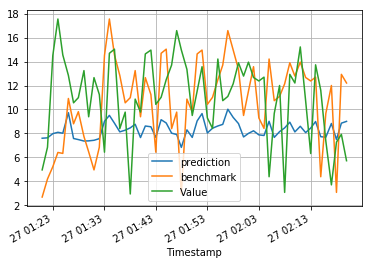

In [512]:
P1.grid('on')
fig = P1.get_figure()
fig
#fig.savefig('C:/Users/janpa/Desktop/Uni/Bachelorarbeit/gathered_stats/VWAP_10_n_ask_RF_comparison_graph.png')


In [ ]:
#todo

#vola neu
#quotient volumen bid ask seiten
#features und target am anfang bauen
#vola in die vergangenheit
#debug option

#präsentation
#3. Methodik
#5. Ausblick